In [1]:
import os
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt


data_dir = '/Users/pranjalmishra/SCAI/ECG_data/user_001'

# List all files in the data directory
files = os.listdir(data_dir)


# Dictionary to store DataFrames
data_frames = {}

# Load each CSV file into a DataFrame
for file in files:
    if file.endswith('.csv'):
        file_path = os.path.join(data_dir, file)
        data_frames[file] = pd.read_csv(file_path)
    

# Example: Print the first few rows of each DataFrame
for file, df in data_frames.items():
    print(f"\nData from {file}:")
    print(df.head())



Data from rr19to21Feb.csv:
         date  minute  value
0  19.02.2022      60  18.10
1  19.02.2022      61  18.20
2  19.02.2022      62  16.50
3  19.02.2022      63  18.25
4  19.02.2022      64  18.80

Data from hr19to21Feb2022.csv:
         date  minute  value
0  19.02.2022      60   65.0
1  19.02.2022      61   65.0
2  19.02.2022      62   69.0
3  19.02.2022      63   67.0
4  19.02.2022      64   69.0

Data from rr19to21Feb (1).csv:
         date  minute  value
0  19.02.2022      60  18.10
1  19.02.2022      61  18.20
2  19.02.2022      62  16.50
3  19.02.2022      63  18.25
4  19.02.2022      64  18.80

Data from ecg_22Feb2022_1500hour.csv:
       Second  ECG value in uV
0  665.793000           -0.004
1  665.800812           -0.005
2  665.808625            0.001
3  665.816437            0.027
4  665.824250            0.025


In [35]:
import pandas as pd
import os
import fnmatch

class HealthDataLoader:
    def __init__(self, data_folder):
        self.data_folder = data_folder
    
    def load_data(self):
        hr_data = pd.DataFrame()
        rr_data = pd.DataFrame()
        
        # Iterate over devices
        for device_folder in os.listdir(self.data_folder):
            device_path = os.path.join(self.data_folder, device_folder)
            if not os.path.isdir(device_path):
                continue
            
            # Iterate over users
            for user_folder in os.listdir(device_path):
                user_path = os.path.join(device_path, user_folder)
                if not os.path.isdir(user_path):
                    continue
                
                # Iterate over days
                for day_file in os.listdir(user_path):
                    if not day_file.endswith('.csv'):
                        continue
                    day_path = os.path.join(user_path, day_file)
                    if "hr" in day_file.lower():
                        user_hr_data = self._load_csv(day_path)
                        if user_hr_data is not None:
                            user_hr_data['User'] = user_folder
                            hr_data = pd.concat([hr_data, user_hr_data], ignore_index=True)
                    elif "rr" in day_file.lower():
                        user_rr_data = self._load_csv(day_path)
                        if user_rr_data is not None:
                            user_rr_data['User'] = user_folder
                            rr_data = pd.concat([rr_data, user_rr_data], ignore_index=True)
        
        return hr_data, rr_data
    
    def _load_csv(self, file_path):
        if file_path and os.path.exists(file_path):
            return pd.read_csv(file_path)
        else:
            print(f"File '{file_path}' does not exist.")
            return None

# Example usage:
loader = HealthDataLoader("ECG_data_new")  # Assuming "data" is the root folder containing device and user data
hr_data, rr_data = loader.load_data()
print("Heart Rate Data:")
print(hr_data.head())
print("\nRespiratory Rate Data:")
print(rr_data.head())


Heart Rate Data:
         date  minute  value      User
0  19.02.2022      60   65.0  user_001
1  19.02.2022      61   65.0  user_001
2  19.02.2022      62   69.0  user_001
3  19.02.2022      63   67.0  user_001
4  19.02.2022      64   69.0  user_001

Respiratory Rate Data:
         date  minute  value      User
0  19.02.2022      60  18.10  user_001
1  19.02.2022      61  18.20  user_001
2  19.02.2022      62  16.50  user_001
3  19.02.2022      63  18.25  user_001
4  19.02.2022      64  18.80  user_001


In [10]:
import pandas as pd
import os
import fnmatch

class HealthDataLoader:
    def __init__(self, data_folder):
        self.data_folder = data_folder
    
    def load_data(self):
        hr_data = pd.DataFrame()
        rr_data = pd.DataFrame()
        
        user_folders = [folder for folder in os.listdir(self.data_folder) if os.path.isdir(os.path.join(self.data_folder, folder))]
        
        for user_folder in user_folders:
            user_hr_file = self._find_file(os.path.join(self.data_folder, user_folder), "hr*.csv")
            user_rr_file = self._find_file(os.path.join(self.data_folder, user_folder), "rr*.csv")
            
            user_hr_data = self._load_csv(user_hr_file)
            user_hr_data['User'] = user_folder
            hr_data = pd.concat([hr_data, user_hr_data], ignore_index=True)
            
            user_rr_data = self._load_csv(user_rr_file)
            user_rr_data['User'] = user_folder
            rr_data = pd.concat([rr_data, user_rr_data], ignore_index=True)
        
        return hr_data, rr_data
    
    def _find_file(self, directory, pattern):
        matching_files = fnmatch.filter(os.listdir(directory), pattern)
        if not matching_files:
            print(f"No file matching pattern '{pattern}' found in {directory}")
            return None
        return os.path.join(directory, matching_files[0])
    
    def _load_csv(self, file_path):
        if file_path and os.path.exists(file_path):
            return pd.read_csv(file_path)
        else:
            print(f"File '{file_path}' does not exist.")
            return None

# Example usage:
loader = HealthDataLoader("ECG_data")
hr_data, rr_data = loader.load_data()
print("Heart Rate Data:")
print(hr_data.head())
print("\nRespiratory Rate Data:")
print(rr_data.head())


Heart Rate Data:
         date  minute  value      User
0  19.02.2022      60   65.0  user_001
1  19.02.2022      61   65.0  user_001
2  19.02.2022      62   69.0  user_001
3  19.02.2022      63   67.0  user_001
4  19.02.2022      64   69.0  user_001

Respiratory Rate Data:
         date  minute  value      User
0  19.02.2022      60  18.10  user_001
1  19.02.2022      61  18.20  user_001
2  19.02.2022      62  16.50  user_001
3  19.02.2022      63  18.25  user_001
4  19.02.2022      64  18.80  user_001


Heart Rate Variability (HRV) Metrics:
SDNN: 22.984968751012044
RMSSD: 11.165794420235626


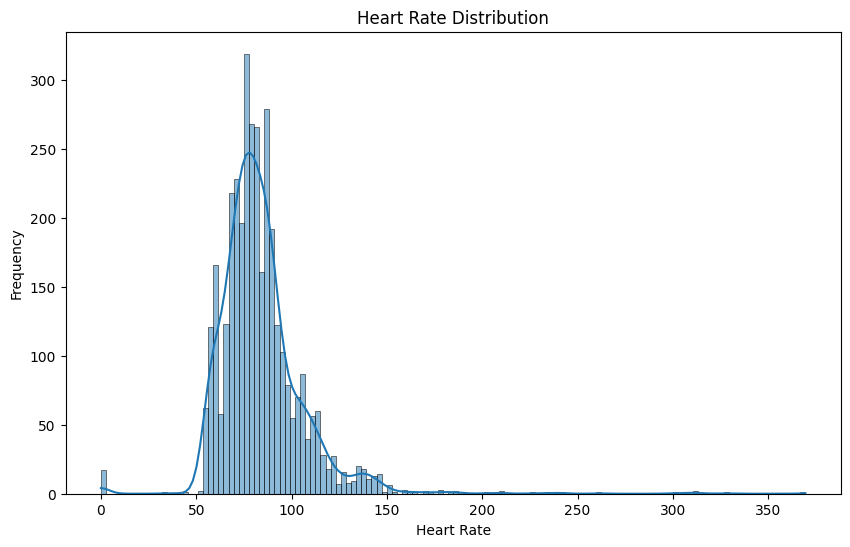

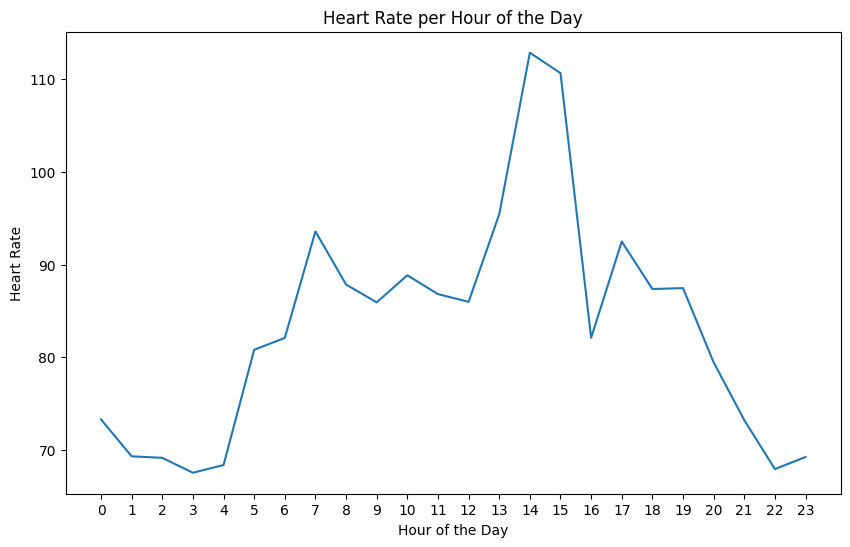

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

class HealthDataAnalyzer:
    def __init__(self, hr_data, rr_data):
        self.hr_data = hr_data
        self.rr_data = rr_data
    
    def calculate_hrv(self):
        # Assuming the heart rate data is already filtered and preprocessed
        # Here we're just demonstrating the calculation of SDNN and RMSSD
        sdnn = self.hr_data['value'].std()
        rr_intervals = self.hr_data['value'].diff().dropna()
        rmssd = (rr_intervals ** 2).mean() ** 0.5
        return sdnn, rmssd
    
    def plot_hr_distribution(self):
        plt.figure(figsize=(10, 6))
        sns.histplot(self.hr_data['value'], kde=True)
        plt.title('Heart Rate Distribution')
        plt.xlabel('Heart Rate')
        plt.ylabel('Frequency')
        plt.show()
    
    def plot_hr_trends(self, interval='hour'):
        plt.figure(figsize=(10, 6))
        if interval == 'hour':
            self.hr_data['hour'] = self.hr_data['minute'] // 60
            sns.lineplot(x='hour', y='value', data=self.hr_data, errorbar=None)
            plt.title('Heart Rate per Hour of the Day')
            plt.xlabel('Hour of the Day')
            plt.ylabel('Heart Rate')
            plt.xticks(range(24))
        elif interval == 'day':
            # Similar approach for daily trends
            pass
        plt.show()

# Example usage:
analyzer = HealthDataAnalyzer(hr_data, rr_data)
sdnn, rmssd = analyzer.calculate_hrv()
print("Heart Rate Variability (HRV) Metrics:")
print("SDNN:", sdnn)
print("RMSSD:", rmssd)

analyzer.plot_hr_distribution()
analyzer.plot_hr_trends(interval='hour')


In [16]:
import pandas as pd

# Load the data
dataset = pd.read_csv('ECG_data/user_001/hr19to21Feb2022.csv')

# Convert 'date' column to datetime
dataset['date'] = pd.to_datetime(dataset['date'], format='%d.%m.%Y')

# Group by 'date'
grouped = dataset.groupby('date')

# Now you can perform operations on each group. For example, to get the mean 'value' for each date:
mean_values = grouped['value'].mean()

print(mean_values)

date
2022-02-19    75.807968
2022-02-20    82.591635
2022-02-21    93.164678
Name: value, dtype: float64


In [22]:
import pandas as pd

# Load the data
dataset = pd.read_csv('ECG_data/user_001/hr19to21Feb2022.csv')

# Convert 'date' column to datetime
dataset['date'] = pd.to_datetime(dataset['date'], format='%d.%m.%Y')

# Group by 'date'
grouped = dataset.groupby('date')

# Find the index of the minimum 'value' for each date
min_value_indices = grouped['value'].idxmin()

print(min_value_indices)

date
2022-02-19     921
2022-02-20    1304
2022-02-21    2552
Name: value, dtype: int64


/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_86039/3778191234.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['value'].replace(0, data['value'].mean(), inplace=True)
/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_86039/3778191234.py:53: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

        date       mean        std   min    max
0 2022-02-19  75.874843  12.240274  55.0  261.0
1 2022-02-20  83.853702  31.873893  33.0  369.5
2 2022-02-21  93.164678  15.773297  65.0  158.0


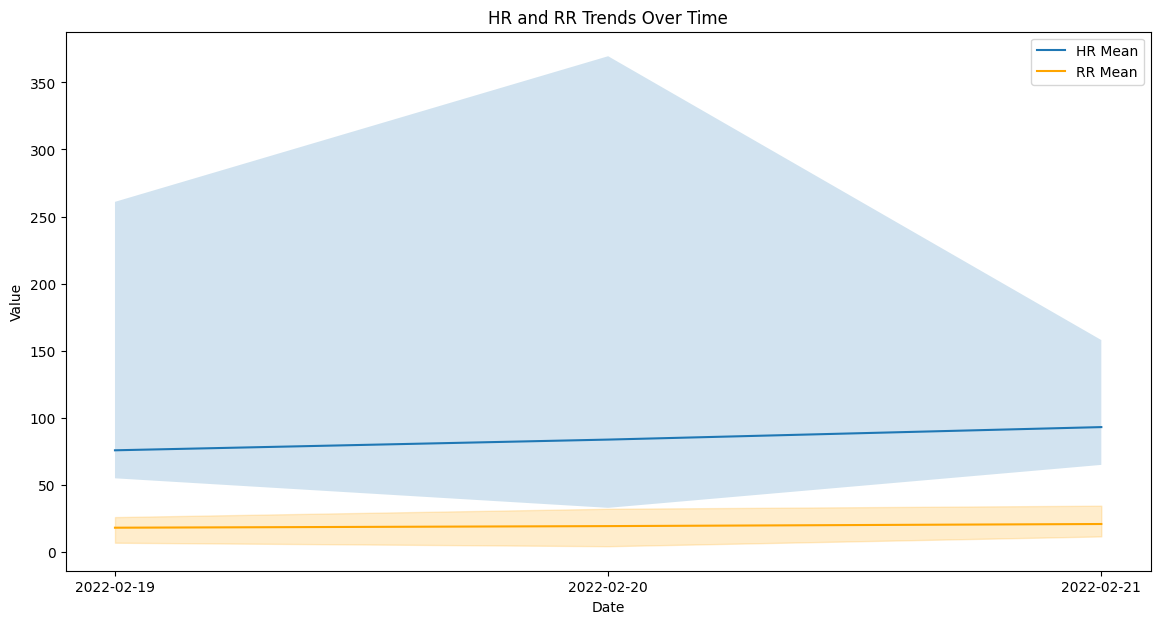

/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_86039/3778191234.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['hour'] = daily_data['minute'] / 60  # Convert minutes to hours
/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_86039/3778191234.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  daily_data['hour'] = daily_data['minute'] / 60  # Convert minutes to hours
/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_86039/3778191234.py:92: SettingWithCopyWarnin

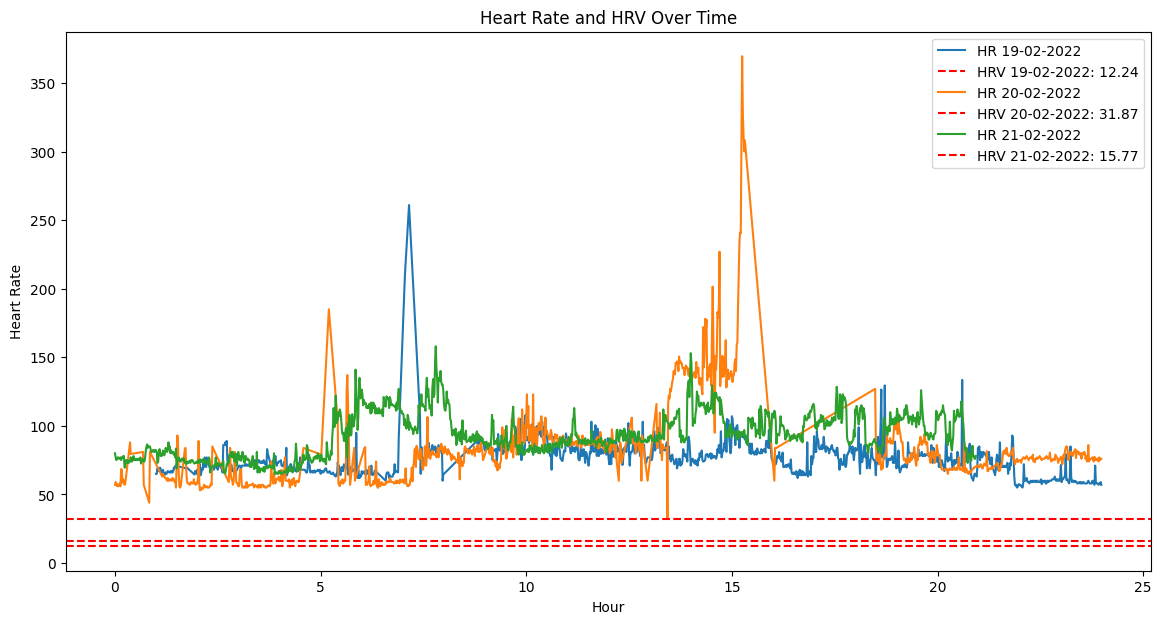

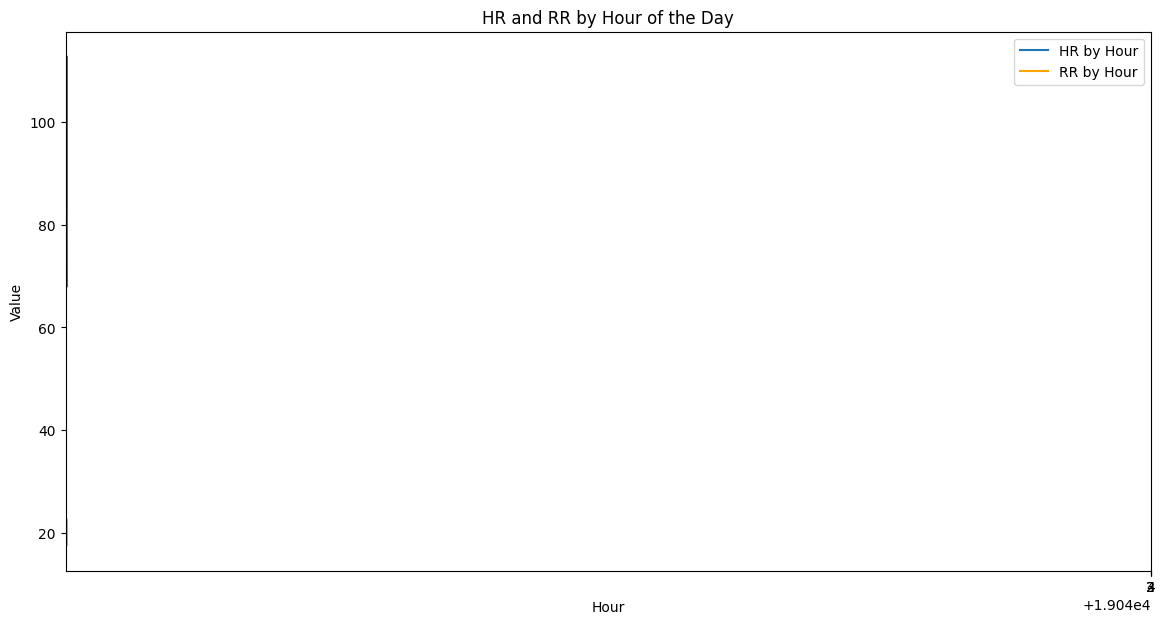

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch
import seaborn as sns

class HealthDataLoader:
    def __init__(self, data_folder):
        self.data_folder = data_folder
    
    def load_data(self):
        hr_data = pd.DataFrame()
        rr_data = pd.DataFrame()
        
        user_folders = [folder for folder in os.listdir(self.data_folder) if os.path.isdir(os.path.join(self.data_folder, folder))]
        
        for user_folder in user_folders:
            user_hr_file = self._find_file(os.path.join(self.data_folder, user_folder), "hr*.csv")
            user_rr_file = self._find_file(os.path.join(self.data_folder, user_folder), "rr*.csv")
            
            user_hr_data = self._load_csv(user_hr_file)
            if user_hr_data is not None:
                user_hr_data['User'] = user_folder
                hr_data = pd.concat([hr_data, user_hr_data], ignore_index=True)
            
            user_rr_data = self._load_csv(user_rr_file)
            if user_rr_data is not None:
                user_rr_data['User'] = user_folder
                rr_data = pd.concat([rr_data, user_rr_data], ignore_index=True)
        
        return hr_data, rr_data
    
    def _find_file(self, directory, pattern):
        matching_files = fnmatch.filter(os.listdir(directory), pattern)
        if not matching_files:
            print(f"No file matching pattern '{pattern}' found in {directory}")
            return None
        return os.path.join(directory, matching_files[0])
    
    def _load_csv(self, file_path):
        if file_path and os.path.exists(file_path):
            return pd.read_csv(file_path)
        else:
            print(f"File '{file_path}' does not exist.")
            return None

def preprocess_data(data):
    # Convert 'date' column to datetime format
    data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
    
    # Replace zero or missing values with the mean value of the 'value' column
    data['value'].replace(0, data['value'].mean(), inplace=True)
    data['value'].fillna(data['value'].mean(), inplace=True)
    
    return data

def analyze_data(hr_data, rr_data):
    # Preprocess data
    hr_data = preprocess_data(hr_data)
    rr_data = preprocess_data(rr_data)
    
    # Group by 'date' and calculate statistics
    hr_grouped = hr_data.groupby('date')['value'].agg(['mean', 'std', 'min', 'max']).reset_index()
    rr_grouped = rr_data.groupby('date')['value'].agg(['mean', 'std', 'min', 'max']).reset_index()
    print(hr_grouped.head())
    #print(rr_grouped.head())
    
    # Plot HR and RR trends over time
    plt.figure(figsize=(14, 7))
    plt.plot(hr_grouped['date'], hr_grouped['mean'], label='HR Mean')
    plt.fill_between(hr_grouped['date'], hr_grouped['min'], hr_grouped['max'], alpha=0.2)
    plt.plot(rr_grouped['date'], rr_grouped['mean'], label='RR Mean', color='orange')
    plt.fill_between(rr_grouped['date'], rr_grouped['min'], rr_grouped['max'], alpha=0.2, color='orange')
    plt.title('HR and RR Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(pd.date_range(start=hr_grouped['date'].min(), end=hr_grouped['date'].max(), freq='D'))
    plt.legend()
    plt.show()

    # Heart Rate Variability (HRV)
    hr_grouped['HRV'] = hr_grouped['std']
    
    #Plot HRV

    unique_dates = hr_grouped['date'].unique()

    plt.figure(figsize=(14, 7))

    for date in unique_dates:
        daily_data = hr_data[hr_data['date'] == date]
        daily_data['hour'] = daily_data['minute'] / 60  # Convert minutes to hours
        daily_hrv = daily_data['value'].std()
        
        plt.plot(daily_data['hour'], daily_data['value'], label=f'HR {date.strftime("%d-%m-%Y")}')
        plt.axhline(y=daily_hrv, color='r', linestyle='--', label=f'HRV {date.strftime("%d-%m-%Y")}: {daily_hrv:.2f}')

    plt.title('Heart Rate and HRV Over Time')
    plt.xlabel('Hour')
    plt.ylabel('Heart Rate')
    plt.legend()
    plt.show()


    # Analyze HR and RR patterns by hour of the day
    hr_data['hour'] = hr_data['minute'] // 60
    rr_data['hour'] = rr_data['minute'] // 60
    
    hr_hourly = hr_data.groupby('hour')['value'].mean().reset_index()
    rr_hourly = rr_data.groupby('hour')['value'].mean().reset_index()
    
    # Plot HR and RR by hour of the day
    plt.figure(figsize=(14, 7))
    plt.plot(hr_hourly['hour'], hr_hourly['value'], label='HR by Hour')
    plt.plot(rr_hourly['hour'], rr_hourly['value'], label='RR by Hour', color='orange')
    plt.title('HR and RR by Hour of the Day')
    plt.xlabel('Hour')
    plt.ylabel('Value')
    plt.legend()
    plt.xticks(pd.date_range(start=hr_grouped['date'].min(), end=hr_grouped['date'].max(), freq='D'))
    plt.show()

# Example usage:
loader = HealthDataLoader("ECG_data")
hr_data, rr_data = loader.load_data()

# Perform analysis
analyze_data(hr_data, rr_data)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import fnmatch

class HealthDataLoader:
    def __init__(self, data_folder):
        self.data_folder = data_folder
    
    def load_data(self):
        hr_data = pd.DataFrame()
        rr_data = pd.DataFrame()
        
        user_folders = [folder for folder in os.listdir(self.data_folder) if os.path.isdir(os.path.join(self.data_folder, folder))]
        
        for user_folder in user_folders:
            user_hr_file = self._find_file(os.path.join(self.data_folder, user_folder), "hr*.csv")
            user_rr_file = self._find_file(os.path.join(self.data_folder, user_folder), "rr*.csv")
            
            user_hr_data = self._load_csv(user_hr_file)
            if user_hr_data is not None:
                user_hr_data['User'] = user_folder
                hr_data = pd.concat([hr_data, user_hr_data], ignore_index=True)
            
            user_rr_data = self._load_csv(user_rr_file)
            if user_rr_data is not None:
                user_rr_data['User'] = user_folder
                rr_data = pd.concat([rr_data, user_rr_data], ignore_index=True)
        
        return hr_data, rr_data
    
    def _find_file(self, directory, pattern):
        matching_files = fnmatch.filter(os.listdir(directory), pattern)
        if not matching_files:
            print(f"No file matching pattern '{pattern}' found in {directory}")
            return None
        return os.path.join(directory, matching_files[0])
    
    def _load_csv(self, file_path):
        if file_path and os.path.exists(file_path):
            return pd.read_csv(file_path)
        else:
            print(f"File '{file_path}' does not exist.")
            return None

    def preprocess_data(self, data):
        # Convert 'date' column to datetime format
        data['date'] = pd.to_datetime(data['date'], format='%d.%m.%Y')
        
        # Replace zero or missing values with the mean value of the 'value' column
        data['value'].replace(0, data['value'].mean(), inplace=True)
        data['value'].fillna(data['value'].mean(), inplace=True)
        
        return data

    def calculate_correlations(self, hr_data, rr_data):
        
        hr_data = self.preprocess_data(hr_data)
        rr_data = self.preprocess_data(rr_data)
        
        # Merge heart rate and respiratory rate data on date and minute
        combined_data = pd.merge(hr_data, rr_data, on=['date', 'minute', 'User'], suffixes=('_hr', '_rr'))

        # Convert date and minute to datetime
        combined_data['timestamp'] = pd.to_datetime(combined_data['date'], format='%d.%m.%Y') + pd.to_timedelta(combined_data['minute'], unit='m')

        # Set the timestamp as the index
        combined_data.set_index('timestamp', inplace=True)

        # Define day time vs. night time
        combined_data['day_night'] = combined_data.index.map(lambda x: 'day' if 6 <= x.hour < 18 else 'night')

        # Define hourly
        combined_data['hour'] = combined_data.index.hour

        # Calculate day time vs. night time correlation
        day_data = combined_data[combined_data['day_night'] == 'day']
        night_data = combined_data[combined_data['day_night'] == 'night']

        day_correlation = day_data['value_hr'].corr(day_data['value_rr'])
        night_correlation = night_data['value_hr'].corr(night_data['value_rr'])

        print(f'Day Time Correlation: {day_correlation}')
        print(f'Night Time Correlation: {night_correlation}')

        # Calculate hourly correlation
        hourly_correlations = combined_data.groupby('hour').apply(lambda x: x['value_hr'].corr(x['value_rr']))

        print(hourly_correlations)
        
        return day_correlation, night_correlation, hourly_correlations

# Example usage:
loader = HealthDataLoader("ECG_data")
hr_data, rr_data = loader.load_data()

# Calculate and print correlations
correlations_hourly = loader.calculate_correlations(hr_data, rr_data)
#correlations_day_night = calculate_correlations(hr_data, rr_data)

print("Hourly Correlations:")
print(pd.DataFrame(correlations_hourly))




Day Time Correlation: 0.4667860980498518
Night Time Correlation: 0.5299207915144142
hour
0     0.649354
1     0.657797
2     0.353656
3     0.214737
4     0.233496
5     0.598115
6     0.876296
7     0.457977
8     0.683942
9     0.223184
10   -0.203868
11    0.138193
12    0.224952
13    0.737170
14    0.387868
15    0.469633
16    0.413812
17    0.300134
18    0.138237
19    0.130178
20    0.605694
21    0.355736
22    0.833579
23    0.858878
dtype: float64
Hourly Correlations:
                                                   0
0                                           0.466786
1                                           0.529921
2  hour
0     0.649354
1     0.657797
2     0.353...


/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_15163/2308735881.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['value'].replace(0, data['value'].mean(), inplace=True)
/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_15163/2308735881.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_15163/2308735881.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['value'].replace(0, data['value'].mean(), inplace=True)
/var/folders/vx/q1q4d_dx1w17fk6nv5v6tylw0000gn/T/ipykernel_15163/2308735881.py:52: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

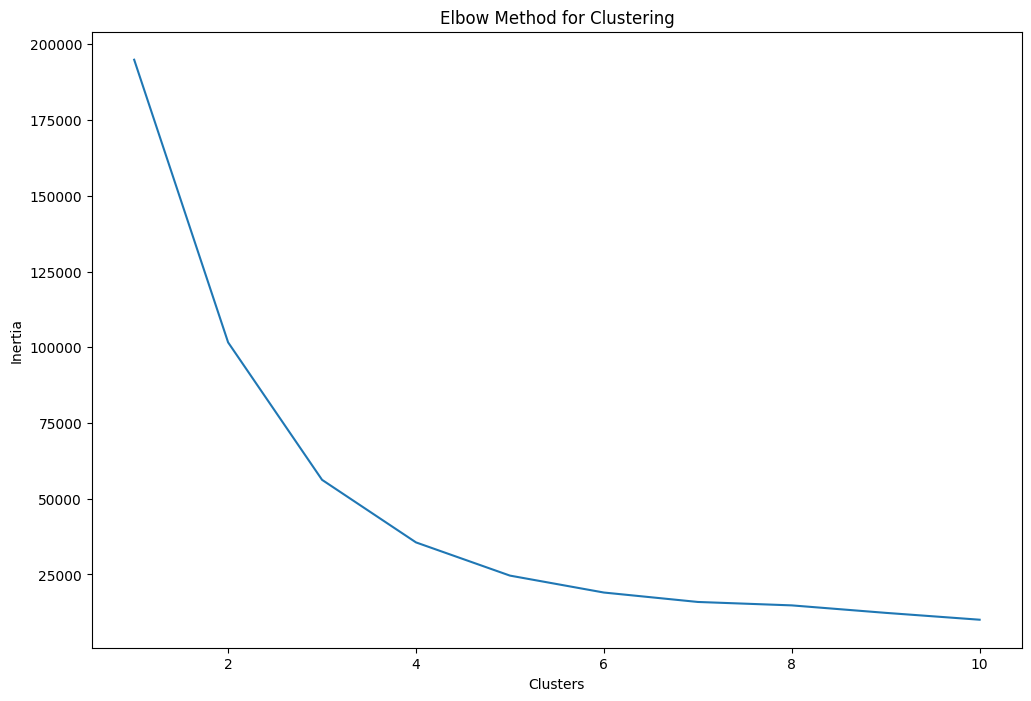

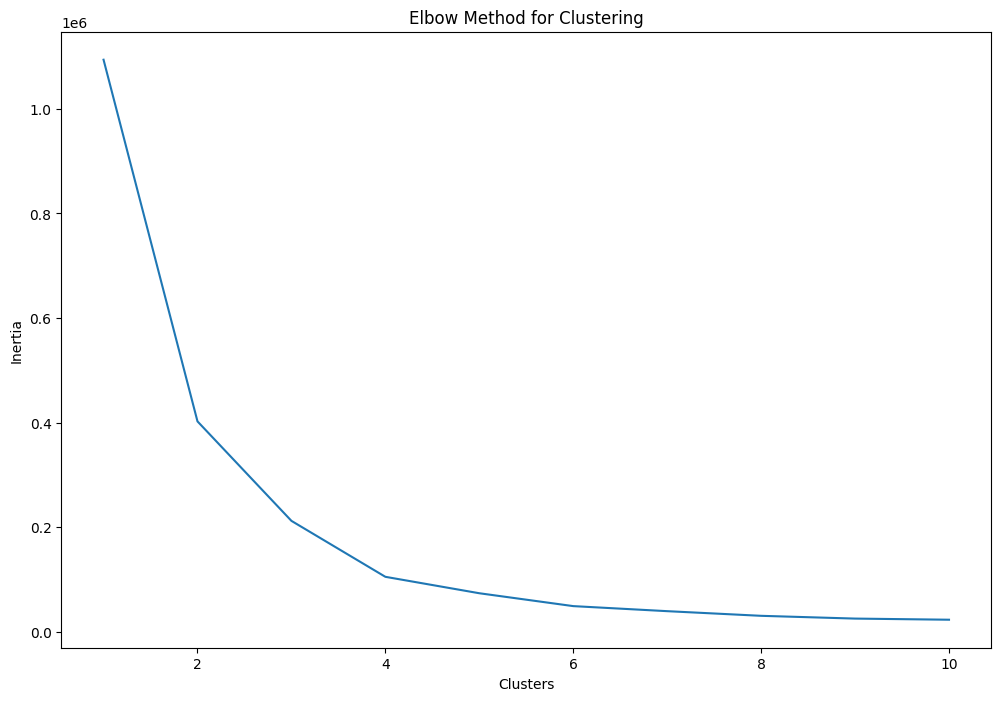

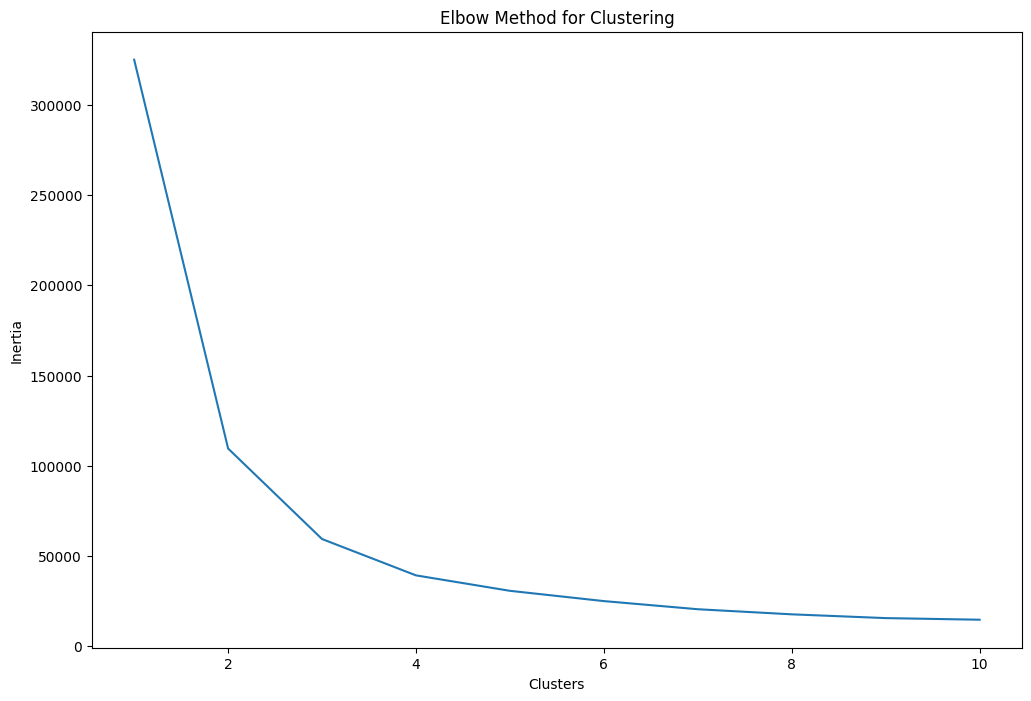

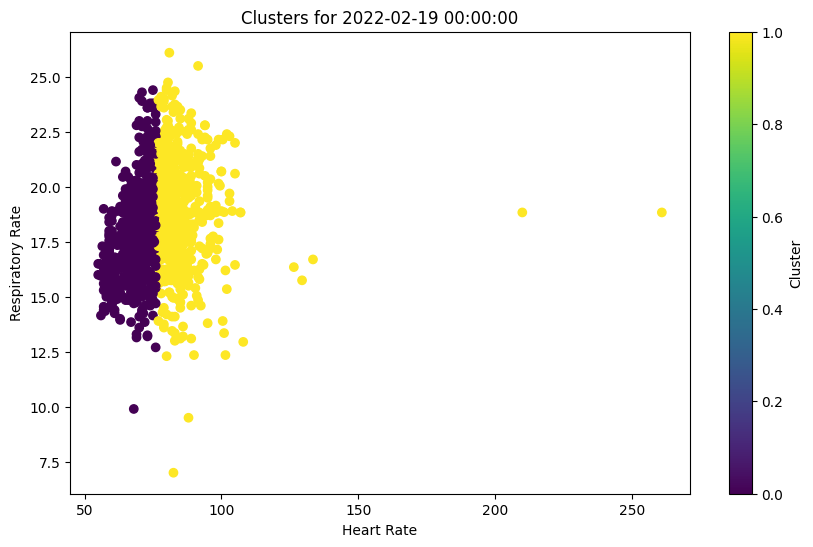

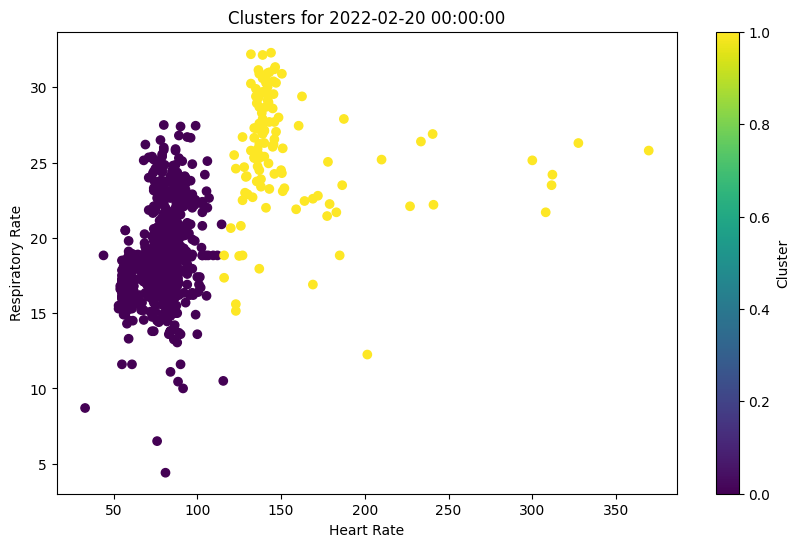

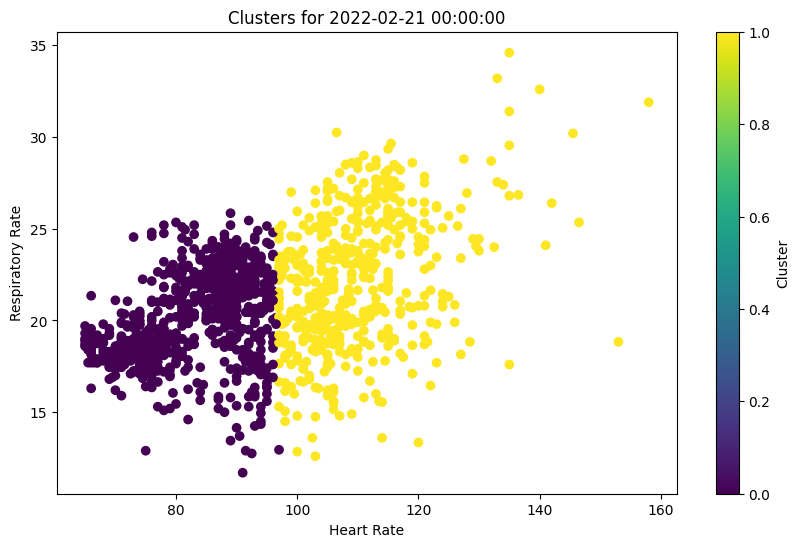

In [29]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns


hr_data, rr_data = loader.load_data()

# Preprocess the data
hr_data = loader.preprocess_data(hr_data)
rr_data = loader.preprocess_data(rr_data)

# Merge HR and RR data on date and minute

# Extract the relevant columns for clustering
def cluster_data(hr_data, rr_data):
    # Merge heart rate and respiratory rate data on date and minute
    combined_data = pd.merge(hr_data, rr_data, on=['date', 'minute', 'User'], suffixes=('_hr', '_rr'))

    # Convert date and minute to datetime
    combined_data['timestamp'] = pd.to_datetime(combined_data['date'], format='%d.%m.%Y') + pd.to_timedelta(combined_data['minute'], unit='m')

    # Group data by date
    grouped = combined_data.groupby('date')
    
    # Prepare a DataFrame to hold clustering results
    cluster_results = pd.DataFrame()

    for name, group in grouped:
        if len(group) > 1:  # Need at least two points to cluster
            X = group[['value_hr', 'value_rr']]
            clusters = []
            for i in range(1, 11):
                km = KMeans(n_clusters=i).fit(X)
                clusters.append(km.inertia_)

            # Plot elbow method
            fig, ax = plt.subplots(figsize=(12, 8))
            sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
            ax.set_title('Elbow Method for Clustering')
            ax.set_xlabel('Clusters')
            ax.set_ylabel('Inertia')
            plt.show()

            # Choose the number of clusters based on the elbow plot
            # Here, you can manually choose or automate the selection process

            # Perform KMeans clustering with the chosen number of clusters
            kmeans = KMeans(n_clusters=2).fit(X)
            group['cluster'] = kmeans.labels_
            cluster_results = pd.concat([cluster_results, group])

    visualize_clusters(cluster_results)
    
def visualize_clusters(cluster_results):
    grouped = cluster_results.groupby('date')

    for name, group in grouped:
        plt.figure(figsize=(10, 6))
        plt.scatter(group['value_hr'], group['value_rr'], c=group['cluster'], cmap='viridis', label=name)
        plt.title(f'Clusters for {name}')
        plt.xlabel('Heart Rate')
        plt.ylabel('Respiratory Rate')
        plt.colorbar(label='Cluster')
        plt.show()
        
cluster_data(hr_data, rr_data)



/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 71.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 61.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 79.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 70.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

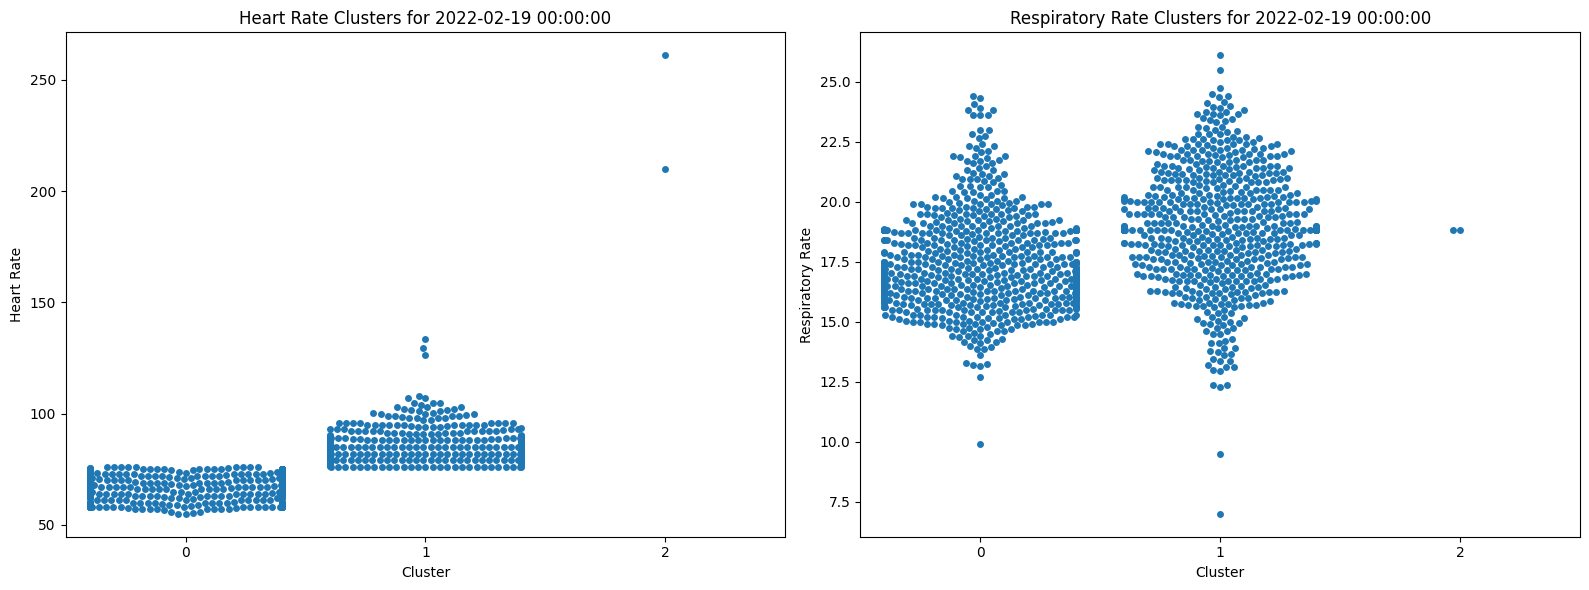

/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 69.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 77.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

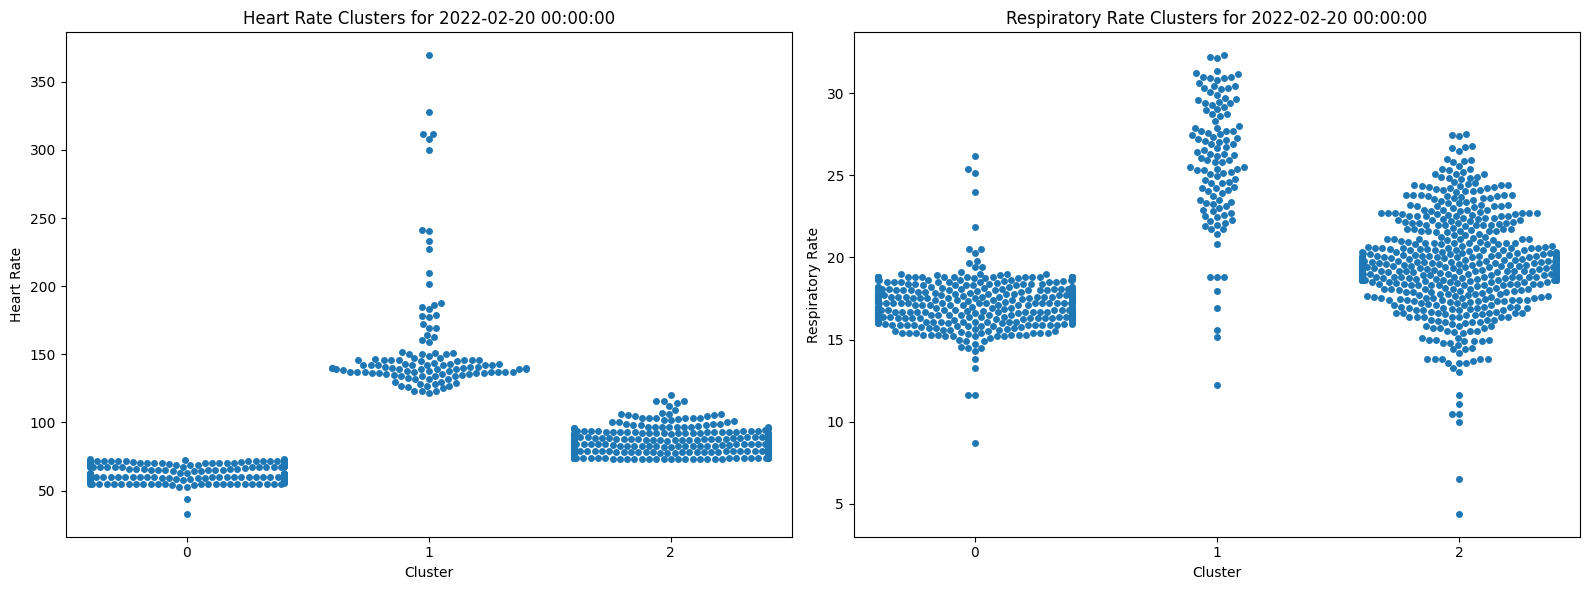

/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 28.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 41.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 19.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/pranjalmishra/opt/anaconda3/envs/scai/lib/python3.12/site-packages/seaborn/categorical.py:3399: UserWarning: 40.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.war

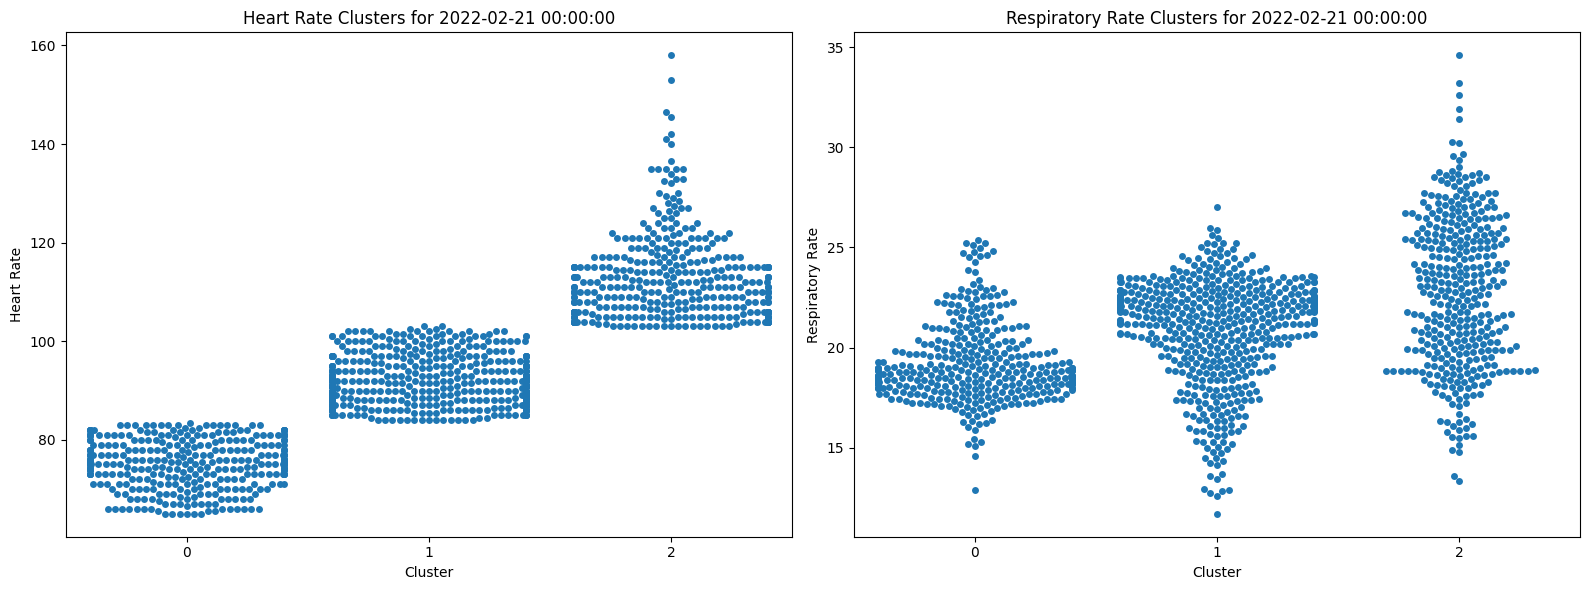

In [31]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming hr_data and rr_data are already loaded and preprocessed

# Function to cluster data and visualize clusters
def cluster_and_visualize(hr_data, rr_data):
    # Merge heart rate and respiratory rate data on date and minute
    combined_data = pd.merge(hr_data, rr_data, on=['date', 'minute', 'User'], suffixes=('_hr', '_rr'))

    # Convert date and minute to datetime
    combined_data['timestamp'] = pd.to_datetime(combined_data['date'], format='%d.%m.%Y') + pd.to_timedelta(combined_data['minute'], unit='m')

    # Group data by date
    grouped = combined_data.groupby('date')
    
    for name, group in grouped:
        if len(group) > 1:  # Need at least two points to cluster
            X = group[['value_hr', 'value_rr']]
            
            # Perform KMeans clustering
            kmeans = KMeans(n_clusters=3).fit(X)
            group['cluster'] = kmeans.labels_

            # Visualize clusters with swarm plots
            fig, axes = plt.subplots(1, 2, figsize=(16, 6))
            sns.swarmplot(x='cluster', y='value_hr', data=group, ax=axes[0])
            axes[0].set_title(f'Heart Rate Clusters for {name}')
            axes[0].set_xlabel('Cluster')
            axes[0].set_ylabel('Heart Rate')

            sns.swarmplot(x='cluster', y='value_rr', data=group, ax=axes[1])
            axes[1].set_title(f'Respiratory Rate Clusters for {name}')
            axes[1].set_xlabel('Cluster')
            axes[1].set_ylabel('Respiratory Rate')

            plt.tight_layout()
            plt.show()

# Call the function to cluster and visualize the data
cluster_and_visualize(hr_data, rr_data)
